In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [33]:
path = os.getcwd()
print(path)

/Users/makkimaki/PycharmProjects/python_programming/SchrodingerSolver_HarmonicLikePotential1D


In [34]:
filename = "SymmetricPotentialEnergy.csv"
df = pd.read_csv(filename, header=4)

In [35]:
df.head()

,% dist,r,"Electric potential (V), Point: (0, 0)"
0,0.14,0.00,0.139774
1,0.14,0.02,0.139782
2,0.14,0.04,0.139795
3,0.14,0.06,0.139814
4,0.14,0.08,0.139829


In [36]:
df = df.rename(columns={"% dist" : 'z', 'Electric potential (V), Point: (0, 0)':'potential'})
df.head()

,z,r,potential
0,0.14,0.00,0.139774
1,0.14,0.02,0.139782
2,0.14,0.04,0.139795
3,0.14,0.06,0.139814
4,0.14,0.08,0.139829


In [37]:
z = df["z"]
r = df["r"]
potential = df["potential"]
print("length of r:", r.shape)
print("length of z:", z.shape)
print("shape of potential:", potential.shape)

length of r: (8446,)
length of z: (8446,)
shape of potential: (8446,)


In [38]:
df_pivot = pd.pivot_table(data=df, index="z", columns="r", values="potential")
print("df_pivot shape:", df_pivot.shape,  "\n")
print("Table data: \n ", df_pivot)

df_pivot shape: (41, 205) 

Table data: 
r         -2.04     -2.02     -2.00     -1.98     -1.96     -1.94     -1.92  \
z                                                                             
0.140  0.142394  0.142170  0.141959  0.141798  0.141713  0.141709  0.141786   
0.142  0.142428  0.142217  0.142021  0.141870  0.141789  0.141782  0.141856   
0.144  0.142460  0.142263  0.142075  0.141935  0.141860  0.141856  0.141922   
0.146  0.142489  0.142305  0.142129  0.141998  0.141927  0.141922  0.141983   
0.148  0.142518  0.142344  0.142179  0.142056  0.141988  0.141985  0.142043   
0.150  0.142545  0.142380  0.142227  0.142113  0.142048  0.142046  0.142099   
0.152  0.142572  0.142416  0.142273  0.142165  0.142104  0.142100  0.142152   
0.154  0.142599  0.142452  0.142315  0.142212  0.142158  0.142153  0.142201   
0.156  0.142621  0.142485  0.142356  0.142260  0.142208  0.142203  0.142246   
0.158  0.142647  0.142514  0.142394  0.142304  0.142253  0.142250  0.142292   
0.160  0.14

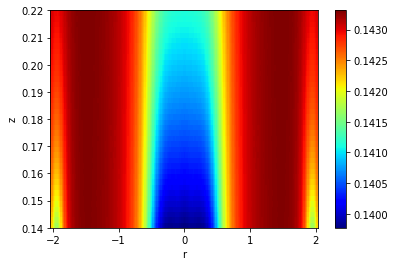

In [39]:
plt.pcolor(df_pivot.columns, df_pivot.index, df_pivot, cmap="jet")
plt.colorbar()
# plt.axis("tight")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

In [40]:
rmin = np.min(r)
rmax = np.max(r)
print("rmin=",rmin, " ","rmax=",rmax)
zmin = np.min(z)
zmax = np.max(z)
print("zmin=",zmin, " ","zmax=",zmax)

rmin= -2.04   rmax= 2.04
zmin= 0.14   zmax= 0.22


In [41]:
mesh_number = 1000
N_r = len(r)
N_z = len(z)
print("N_r:", N_r)
print("N_z:", N_z)
x = np.linspace(rmin, rmax, num=mesh_number)
y = np.linspace(zmin, zmax, num=mesh_number)
xx, yy = np.meshgrid(x, y)

N_r: 8446
N_z: 8446


In [42]:
import scipy.interpolate as interp

In [48]:
fun = interp.interp2d(df_pivot.columns, df_pivot.index, df_pivot, kind="cubic")
# fun(1,3)[0]
funs = fun(x, y)

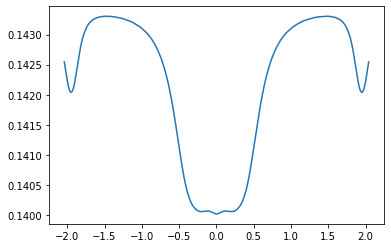

In [44]:
plt.plot(x, fun(x, 0.15))
plt.show()

In [51]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [52]:
z_label = r"Voltage (V)"

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(xx, yy, funs, cmap="jet", linewidth=0)
fig.colorbar(surf, label=z_label)
plt.xlabel("r ($\mu$m)")
plt.ylabel("z ($\mu$)m")
plt.show()

<IPython.core.display.Javascript object>

In [53]:
print(2)

2
